In [1]:
import pandas as pd
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'])
df.set_index('date', inplace=True)


Index(['Ex_rate'], dtype='object')


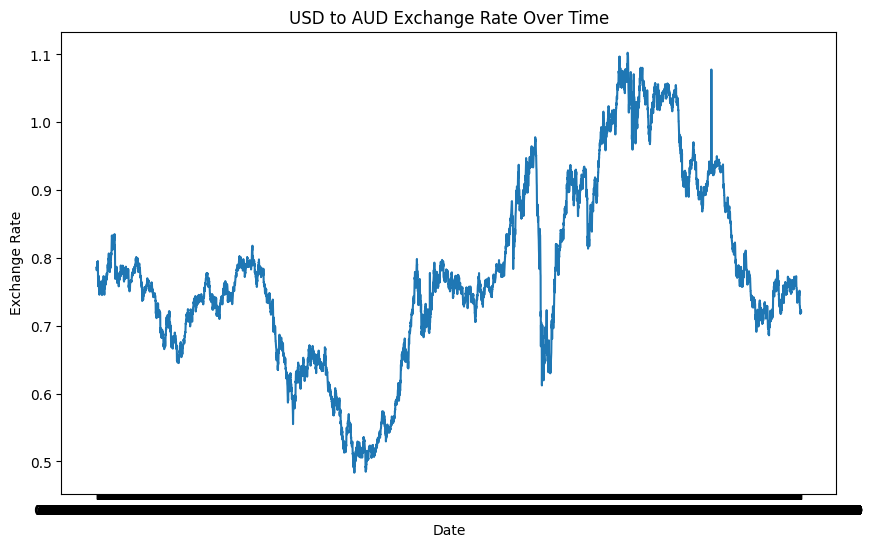

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

# Check for the correct column name in the DataFrame
print(df.columns)

# Assuming the actual column name is 'Ex_rate' based on the global variables
# Correct the column name in the plot function
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'])  # Changed from 'USD_to_AUD' to 'Ex_rate'
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [4]:
df.isnull().sum()  # Check for missing values
df.fillna(method='ffill', inplace=True)  # Handle missing values


<ipython-input-4-e0bca0acf71b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Handle missing values


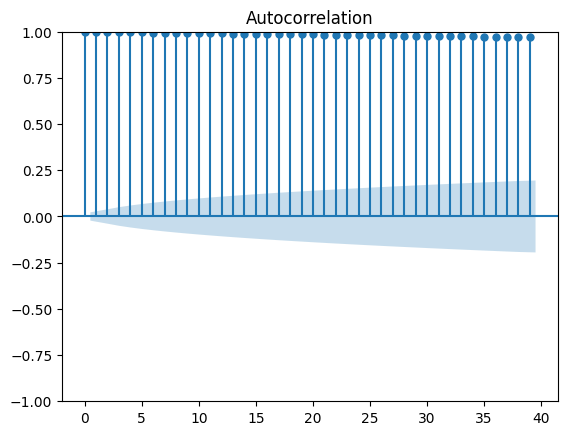

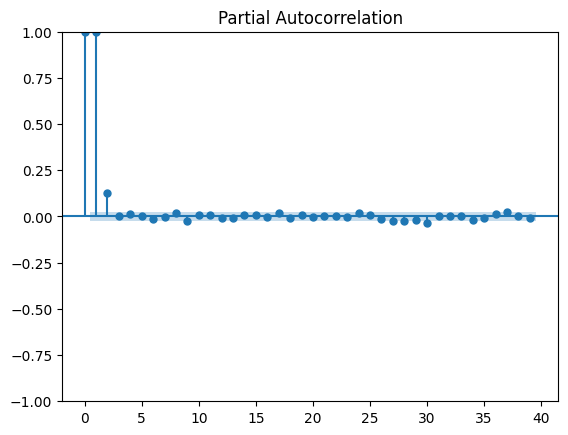

In [6]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ... (your existing code to load and preprocess the data) ...

# Replace 'USD_to_AUD' with 'Ex_rate' in the plot functions
plot_acf(df['Ex_rate']) # Changed 'USD_to_AUD' to 'Ex_rate'
plot_pacf(df['Ex_rate']) # Changed 'USD_to_AUD' to 'Ex_rate'
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the ARIMA model
p = 5  # Example value for the autoregressive (AR) component
d = 1  # Example value for the integrated (I) component
q = 0  # Example value for the moving average (MA) component

model = ARIMA(df['Ex_rate'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28055.685
Date:                Mon, 25 Nov 2024   AIC                         -56099.370
Time:                        09:07:07   BIC                         -56057.765
Sample:                             0   HQIC                        -56085.091
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.406      0.685      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.0

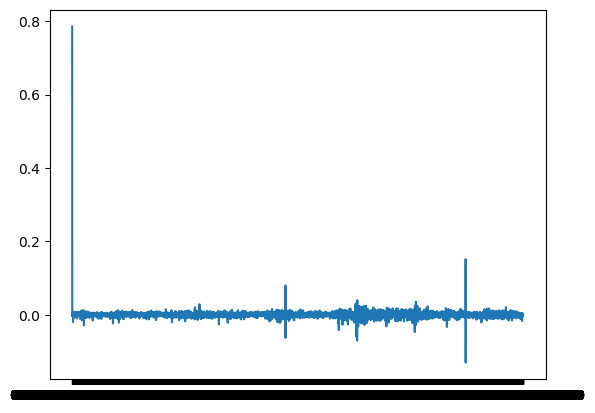

In [9]:
residuals = model_fit.resid
plt.plot(residuals)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


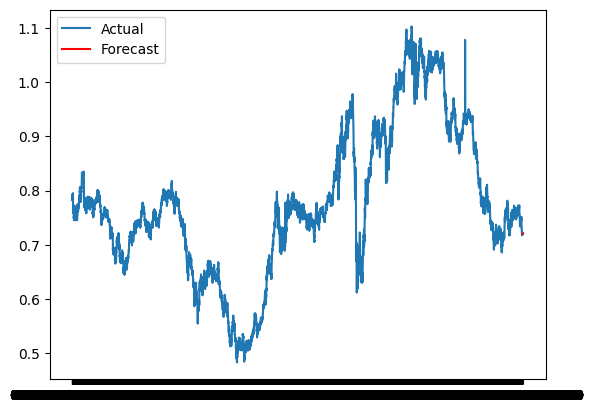

In [11]:
forecast = model_fit.forecast(steps=10)
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [13]:
# Grid search or AIC-based optimization


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


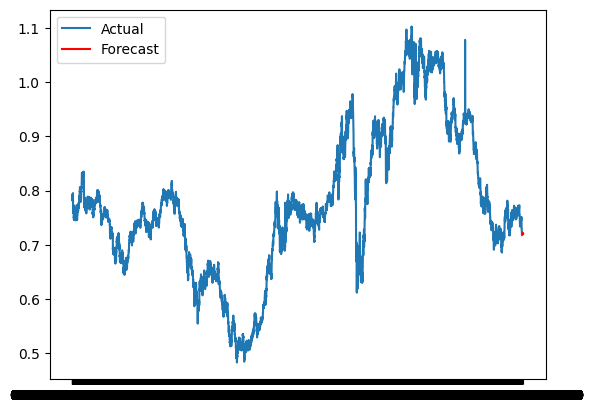

In [14]:
forecast = model_fit.forecast(steps=10)
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [16]:
import numpy as np # Import the numpy library and assign it the alias 'np'
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df['Ex_rate'][-10:], forecast)
mse = mean_squared_error(df['Ex_rate'][-10:], forecast)
rmse = np.sqrt(mse) # Now you can use np.sqrt since numpy has been imported

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

ARIMA - MAE: 0.17780239504335849, RMSE: 0.2055405871355618, MAPE: 0.22809757924533444
Exponential Smoothing - MAE: 0.20675470865512963, RMSE: 0.23928931038324866, MAPE: 0.26529010158066424


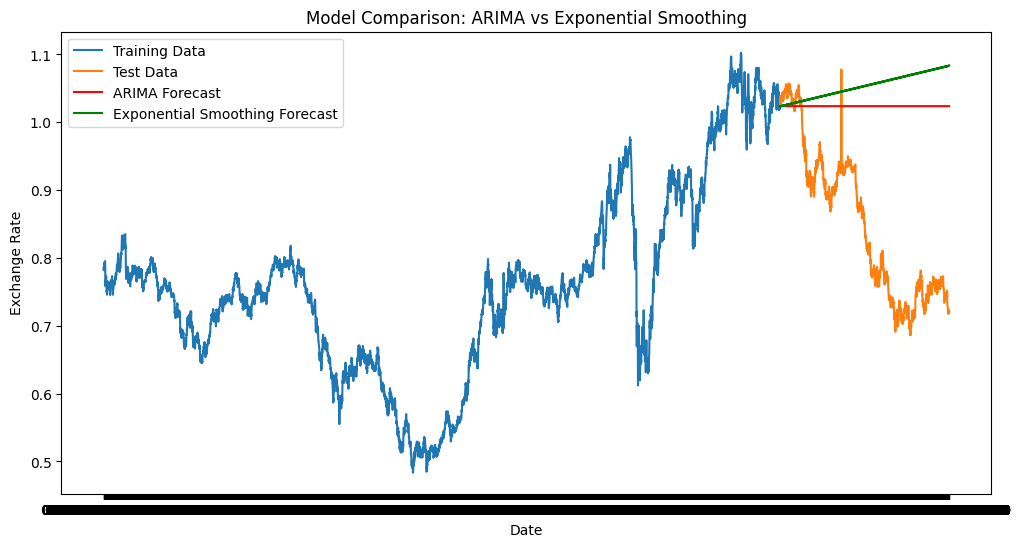

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ARIMA Model
arima_model = ARIMA(train['Ex_rate'], order=(p, d, q))  # Replace (p, d, q) with actual values
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))

# Exponential Smoothing Model
exp_model = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
exp_fit = exp_model.fit()
exp_forecast = exp_fit.forecast(steps=len(test))

# Error Metrics Calculation
mae_arima = mean_absolute_error(test['Ex_rate'], arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test['Ex_rate'], arima_forecast))
mape_arima = mean_absolute_percentage_error(test['Ex_rate'], arima_forecast)

mae_exp = mean_absolute_error(test['Ex_rate'], exp_forecast)
rmse_exp = np.sqrt(mean_squared_error(test['Ex_rate'], exp_forecast))
mape_exp = mean_absolute_percentage_error(test['Ex_rate'], exp_forecast)

# Print Error Metrics
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Exponential Smoothing - MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Ex_rate'], label='Training Data')
plt.plot(test.index, test['Ex_rate'], label='Test Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.legend()
plt.title('Model Comparison: ARIMA vs Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()
